## scipyによる確率分布

### 目次

1. [公式データセット](/article/library/sklearn/datasets/) <= 本節
2. [データの作成](/article/library/sklearn/makedatas/)

### github
- jupyter notebook形式のファイルは[こちら](https://github.com/hiroshi0530/wa/blob/master/src/sklearn/datasets/ds_nb.ipynb)


### 筆者の環境

In [1]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.14.6
BuildVersion:	18G2022


In [2]:
!python -V

Python 3.7.3


In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib
import matplotlib.pyplot as plt
import scipy

matplotlib.__version__
scipy.__version__

'1.4.1'

## 正規分布

In [4]:
from scipy.stats import norm

x = norm.rvs(size=1000)

(array([  6.,   8.,  16.,  25.,  46.,  52.,  86.,  87., 116., 131., 108.,
        103.,  77.,  62.,  32.,  24.,   6.,  11.,   2.,   2.]),
 array([-2.89146351, -2.5827596 , -2.2740557 , -1.96535179, -1.65664788,
        -1.34794397, -1.03924006, -0.73053615, -0.42183225, -0.11312834,
         0.19557557,  0.50427948,  0.81298339,  1.1216873 ,  1.4303912 ,
         1.73909511,  2.04779902,  2.35650293,  2.66520684,  2.97391075,
         3.28261465]),
 <a list of 20 Patch objects>)

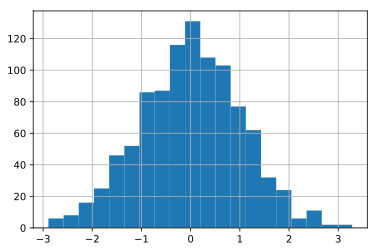

In [5]:
plt.grid()
plt.hist(x, bins=20)

<!-- 特殊関数部分 -->

# 確率分布と特殊関数

ベイズ統計を理解するために必要な確率分布と行列計算の定理を簡単に整理します。

## 基本的な確率分布

ここではベイズ統計を理解するために必要な基本的な確率分布と必要な特殊関数の説明を行います。基本的な性質をまとめています。また、サンプリングするpythonのコードも示しています。基本的にはscipyモジュールの統計関数を利用するだけです。

### ベルヌーイ分布
 コイン投げにおいて、表、もしくは裏が出る分布のように、試行の結果が2通りしか存在しない場合の分布を決定します。

#### 表式
$
P\left( x \| \mu \right) = \mu^{x}\left(1-\mu \right)^{1-x} \quad \left(x = 0 \text{ or }1 \right) 
$

もしくは、

<div>
$$
 P\left(x | \mu \right)= \begin{cases}
   1 - \mu &\text{if } x = 0 \\
   \mu &\text{if } x = 1
\end{cases}
$$
</div>

となります。$x$が0か1しか取らないことに注意してください。

#### 平均
$
E\left[x \right]=\mu
$

#### 分散
$
V\left[x\right]=\mu\left(1-\mu \right)
$

#### python code
```python
from scipy.stats import bernoulli

mu=0.3
size=100

print(bernoulli.rvs(mu, size=size))

""" output
[0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0]
"""
```

### 二項分布
コイン投げを複数回行った結果、表が出来る回数の確率が従う分布になります。回数が1の時はベルヌーイ分布に一致します。$n$がコインを投げる回数、$p$が表が出る確率、$k$が表が出る回数で確率変数になります。詳細な計算は別途教科書を参照してください。

#### 表式
$ \displaystyle
P\left(k | n,p \right) = \frac{n!}{k!\left(n-k \right)!} p^{k}\left( 1-p\right)^{n-k}
$

#### 平均
$ \displaystyle
E\left[k \right] = np
$

#### 分散
$ \displaystyle
V\left[k \right] = np\left(1-p \right) 
$

#### python code
```python
import numpy as np
import scipy
from scipy.stats import binom
import matplotlib.pyplot as plt


def plot_binomial():

  n = 100
  x = np.arange(n)

  
  # case.1
  p = 0.3
  y1 = binom.pmf(x,n,p)

  # case.2
  p = 0.5
  y2 = binom.pmf(x,n,p)

  # case.3
  p = 0.9
  y3 = binom.pmf(x,n,p)
  
  # fig, ax = plt.subplots(facecolor="w")
  plt.plot(x, y1, label="$p=0.3$")
  plt.plot(x, y2, label="$p=0.5$")
  plt.plot(x, y3, label="$p=0.9$")
  
  plt.xlabel('$k$')
  plt.ylabel('$B(n,p)$')
  plt.title('binomial distribution n={}'.format(n))
  plt.grid(True)

  plt.legend()


  # plt.plot(x,y1,x,y2,x,y3)
  # plt.legend()
  plt.savefig('../static/images/statistics_binomial.png') 
  
if __name__ == "__main__":
  plot_binomial()
```

#### グラフ
$p=0.3, 0.5, 0.9$の場合の二項分布の確率質量関数になります。

{{<figure src="/images/statistics_binomial.png" class="center">}}

### カテゴリ分布
#### 平均
$ \displaystyle
\left[x \right] = 
$

#### 分散
$ \displaystyle
V\left[x \right] = 
$

#### python code
```python

```


### 多項分布
#### 平均
$ \displaystyle
E\left[x \right] = 
$

#### 分散
$ \displaystyle
V\left[x \right] = 
$

#### python code
```python

```


### $\rm Beta$分布
#### 平均
$ \displaystyle
E\left[x \right] = 
$

#### 分散
$ \displaystyle
V\left[x \right] = 
$

#### python code
```python

```


### $\rm Gamma$分布
#### 平均
$ \displaystyle
E\left[x \right] = 
$

#### 分散
$ \displaystyle
V\left[x \right] = 
$

#### python code
```python

```


### カイ二乗分布
#### 平均
$ \displaystyle
E\left[x \right] = 
$

#### 分散
$ \displaystyle
V\left[x \right] = 
$ 

#### python code
```python

```


### ステューデントのt分布
#### 平均
$ \displaystyle
E\left[x \right] = 
$

#### 分散
$ \displaystyle
V\left[x \right] = 
$

#### python code
```python

```


## 特殊関数

### $\rm Beta$関数
### $\rm Gamma$関数


## まとめ

### 主要確率分布一覧 

<!-- <div style="width:100%; margin: 10px 40px 10px 40px;"> -->
<style>.cent td {text-align:center;}</style>
<style>.cent tr {text-align:center;}</style>

<div style="width:100%;"> 
<table class="cent">
  <tr>
    <th>名前</th>
    <th>確率密度関数</th>
    <th>確率変数</th>
    <th>params</th>
    <th>$\displaystyle E[x]$</th>
    <th>$\displaystyle V[x]$</th>
    <th>概要</th>
  </tr>
  <tr>
    <td>二項分布</td>
    <td>$\displaystyle \binom{n}{k}p^k\left(1-p\right)^{n-k}$</td>
    <td>$k$</td>
    <td>$n,p$</td>
    <td>$np$</td>
    <td>$np(1-p)$</td>
    <td>成功確率$\displaystyle p $の試行を$n$回行い、その成功回数が従う確率分布 </td>
  </tr>
  <tr>
    <td>ポアソン分布</td>
    <td>$\displaystyle \dfrac{\lambda^ke^{-\lambda}}{k!}$</td>
    <td>$k$</td>
    <td>$\lambda$</td>
    <td>$\lambda$</td>
    <td>$\lambda$</td>
    <td align="left">単位時間あたり$\displaystyle \lambda$回起こる事象の、単位時間あたりの発生回数が従う確率分布</td>
  </tr>
  <tr>
    <td>正規分布</td>
    <td>$\displaystyle \dfrac{1}{\sqrt{2\pi \sigma^2}}\exp\left(-\dfrac{\left(x-\mu\right)^2}{2\sigma^2}\right)$</td>
    <td>$x$</td>
    <td>$\mu,\sigma$</td>
    <td>$\mu$</td>
    <td>$\sigma^2$</td>
    <td></td>
  </tr>
  <tr>
    <td>幾何分布</td>
    <td>$\displaystyle p\left(1-p\right)^k$</td>
    <td>$k$</td>
    <td>$p$</td>
    <td>$\displaystyle \dfrac{1-p}{p}$</td>
    <td>$\displaystyle \dfrac{1-p}{p^2}$</td>
    <td align="left">成功確率$\displaystyle p $の試行を行い、はじめての成功を得られるまでに必要な失敗の回数が従う確率分布</td>
  </tr>
  <tr>
    <td>指数分布</td>
    <th>$\lambda e^{-\lambda x} $</th>
    <td>$\displaystyle x $</td>
    <td>$\displaystyle \lambda $</td>
    <td>$\displaystyle \dfrac{1}{\lambda} $</td>
    <td>$\displaystyle \dfrac{1}{\lambda^2} $</td>
    <td>単位時間あたり$\displaystyle \lambda$回起こる事象において、始めて発生する時間が従う確率分布</td>
  </tr>
  <tr>
    <td>負の二項分布</td>
    <td>$\displaystyle \binom{n+k-1}{k-1}p^n\left(1-p\right)^{k}$</td>
    <td>$k$</td>
    <td>$n,p$</td>
    <td>$\displaystyle \dfrac{n}{p}$</td>
    <td>$\displaystyle \dfrac{n\left(1-p\right)}{p^2}$</td>
    <td align="left">成功確率$\displaystyle p $の試行を行い、$n$回の成功を得られるまでに必要な失敗の回数が従う確率分布 (定義は他にもあり)</td>
  </tr>
  <tr>
    <td>ガンマ分布</td>
    <td>$\displaystyle \dfrac{x^{n-1}\lambda^{n}}{\Gamma\left(n\right)}e^{-\lambda x} $ <br>for $x > 0$</td>
    <td>$x$</td>
    <td>$n,\lambda$</td>
    <td>$\displaystyle \dfrac{n}{\lambda}$</td>
    <td>$\displaystyle \dfrac{n}{\lambda^2}$</td>
    <td>単位時間あたり$\displaystyle \lambda$回起こる事象において、$n$回発生する時間が従う確率分布</td>
  </tr>
</table>
</div>

